<a href="https://colab.research.google.com/github/greek-nlp/benchmark/blob/main/nlp_gr_access_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialisation


In [1]:
%%capture
!git clone https://github.com/greek-nlp/gen-a.git
!pip install zenodo-get
!pip install datasets
!pip install conll-df

In [2]:
import pandas as pd
import importlib

gr_data = pd.read_csv('gen-a/data.csv')
gena = importlib.import_module("gen-a.data_wrapper")

# GEC

In [3]:
korre = gena.KorreDt(datasets=gr_data)
korre_train = korre.get('train')

Download github items in directory: /content/repo_244
Successfully downloaded GNC


# Toxicity

In [4]:
zampieri = gena.ZampieriDt(datasets = gr_data)
zampieri_test = zampieri.get('test')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

offenseval_2020.py:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/190k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8743 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1544 [00:00<?, ? examples/s]

# MT

In [5]:
prokopidis_mt = gena.ProkopidisMtDt(datasets=gr_data)
pd.set_option('display.max_colwidth', None)
for lang in prokopidis_mt.target_langs:
  print(f"Language: {lang} ({prokopidis_mt.langs_dict[lang]})")
  display(prokopidis_mt.get(lang, 'train').sample())

source: ell, target: eng
source: ell, target: jpn
source: ell, target: fas
Language: eng (English)


,source,target
9887,Η Βόρεια Κορέα εξέφρασε την επιθυμία να μοιραστεί την διοργάνωση κάποιων από τα Ολυμπιακά αθλήματα με τη Νότια Κορέα.,[North Korea expressed that it would like to share some Olympic events with South Korea.]


Language: jpn (Japanese)


,source,target
1665,Αρμένιοι και Αζέροι ακόμα συζητούν από ποιον προέρχεται το τραγούδι “Sari Gelin” και ποιος εφηύρε τους τολμάδες.,[音楽やカーペットの織物の図案についても沢山の議論があり、そして間違いなく料理の起源も同様だ。]


Language: fas (Farsi)


,source,target
1455,@MusabUK: Ο Ashraf Fayadh κρατείται με την κατηγορία του αθεϊσμού.,[آیا آتئیسم یک اتهام است؟ آیا ایمان زوری است؟]


# Intent

In [6]:
rizou_test = gena.RizouDt(datasets=gr_data).get('test')
rizou_test.sample()

,ne_tags,intent,text
400,O O O O O O course_name_b course_name_i course_name_i course_name_i,getCoeffByCourseName,ποιος ειναι ο βαθμος βαρυτητας στα βασικο εργαστηριο φυσικης ιιι


# Summarisation

In [7]:
koniaris = gena.KoniarisDt(datasets = gr_data)
koniaris_test = koniaris.get('test')

README.md:   0%|          | 0.00/153 [00:00<?, ?B/s]

hugginface_dataset.csv:   0%|          | 0.00/289M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8395 [00:00<?, ? examples/s]

subset
0    5888
1    1269
2    1238
Name: count, dtype: int64


# Clustering

In [ ]:
%%capture
papaloukas_test = gena.PapaloukasDt(datasets=gr_data).get('test')

In [ ]:
papaloukas.sample()

,text,volume,chapter,subject
1014,2. ΒΑΣΙΛΙΚΟΝ ΔΙΑΤΑΓΜΑ της 14/27 Νοεμ. 1951 Περ...,40,32,275


# Structure prediction (POS, NER)

## NER

In [ ]:
barziokas_test = gena.BarziokasDt(datasets=gr_data).get('test')
barziokas_test.sample()

Download github items in directory: /content/repo_285
Successfully downloaded dataset


,sentence,ne_tag4,ne_tag18
29,[naftemporiki.gr],[S-ORG],[S-ORG]


## POS

In [ ]:
prokopidis_ud_test = gena.ProkopidisUdDt( datasets=gr_data).get('test')
prokopidis_ud_test.head()

Download github items in directory: /content/repo_438
Successfully downloaded el_gdt-ud-train.conllu
Successfully downloaded el_gdt-ud-dev.conllu
Successfully downloaded el_gdt-ud-test.conllu


w         l      x      p   g         f type Person Tense Foreign  \
s i                                                                            
1 1    Κύριε    κύριος   NOUN   NOUN   2      nmod    _      _     _       _   
  2  Πρόεδρε  πρόεδρος   NOUN   NOUN  13  vocative    _      _     _       _   
  3        ,         ,  PUNCT  PUNCT   2     punct    _      _     _       _   
  4       το         ο    DET    DET   5       det  Art      _     _       _   
  5   ζήτημα    ζήτημα   NOUN   NOUN  13     nsubj    _      _     _       _   

    Case Gender Definite Aspect Type Poss Voice Number Mood Degree  
s i                                                                 
1 1  Voc   Masc        _      _    _    _     _   Sing    _      _  
  2  Voc   Masc        _      _    _    _     _   Sing    _      _  
  3    _      _        _      _    _    _     _      _    _      _  
  4  Nom   Neut      Def      _  Art    _     _   Sing    _      _  
  5  Nom   Neut        _      _    _    _     _   Sing    _      _

# Authorship analysis

In [ ]:
barzokas_train = gena.BarzokasDt(datasets=gr_data).get('train')
barzokas_train.sample()

Download github items in directory: /content/repo_56
Successfully downloaded data/corpora


,id,title,author,type,publishedYear,isbn,filename,postUrl,attachmentUrl,authorYearOfBirth,authorYearOfDeath,tokensCount,text,status,publisher
80,PG17995,Ηλέκτρα,Euripides,NaN,1910,NaN,NaN,NaN,NaN,0.0,-406.0,13239.0,Translation into modern Greek by Angelos Tanag...,malformed,project_gutenberg


# Language modeling

* Analysing raw data

In [10]:
#@title download the data
raw_data = {}
raw_data['prokopidis'] = gena.ProkopidisCrawledDt(datasets=gr_data).get('train')
raw_data['dritsa'] = gena.DritsaDt(datasets=gr_data).get('train')
raw_data['papantoniou'] = gena.PapantoniouDt(datasets=gr_data).get('train')

Title: A Greek Parliament Proceedings Dataset for Computational Linguistics and Political Analysis
Keywords: 
Publication date: 2022-06-09
DOI: 10.5281/zenodo.7005201
Total size: 1.4 GB

Link: https://zenodo.org/records/7005201/files/Greek Parliament Proceedings Dataset_Support Files_Word Usage Change Computations.zip   size: 1.4 GB

Checksum is correct. (81b2db432707334f85bd6feb44caac79)
All files have been downloaded.
Title: Dataset for Named Entity Recognition and Entity Linking from Greek Wikipedia Events
Keywords: Named Entity Recognition, Named Entity Linking, Benchmarking
Publication date: 2022-12-12
DOI: 10.5281/zenodo.7429037
Total size: 2.9 MB

Link: https://zenodo.org/records/7429037/files/ner_nel_greek_dataset.zip   size: 2.9 MB

Checksum is correct. (4dd6186f149be5b5a76336c28b88c1f1)
All files have been downloaded.


* Train a character-level language model per dataset.
* Compute the BPC per dataset.
* Draw a BPC heatmap, showing in red the dataset linguistically surprised by which.

In [11]:
#!git clone https://github.com/ipavlopoulos/lm.git
from lm.markov.models import LM

train_sets = {}
test_sets = {}
for dataset_name in raw_data:
  print(dataset_name)
  dataset = raw_data[dataset_name]
  dataset = dataset[dataset.text.notna()]
  dataset = dataset.sample(frac=1).reset_index(drop=True)
  train_sets[dataset_name] = dataset.text.apply(lambda x: x[:100]).iloc[:1000] # lower lim
  test_sets[dataset_name] = dataset.text.apply(lambda x: x[:100]).iloc[1000:1500]

prokopidis
dritsa
papantoniou


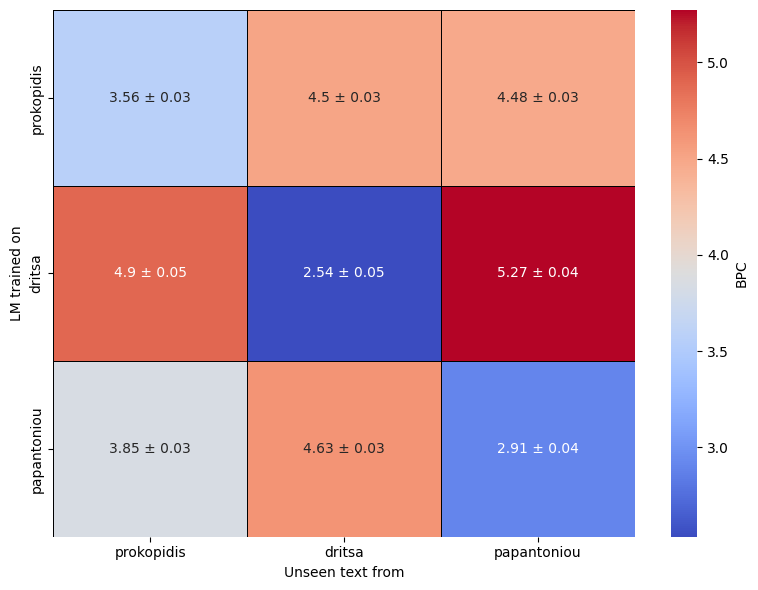

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize dictionaries to store means and standard deviations
ppls = {}
ppls_sem = {}

# Calculate means and standard deviations
for dname in raw_data:
    train = train_sets[dname]
    test = test_sets[dname]
    lm = LM(gram="CHAR")
    lm.train(' '.join(train.values)[:65000])  # length of min dataset
    ppls[dname] = {}
    ppls_sem[dname] = {}
    for dname2 in raw_data:
        scores = test_sets[dname2].apply(lm.bpc)
        ppls[dname][dname2] = scores.mean()
        ppls_sem[dname][dname2] = scores.sem()

# Convert to DataFrames
ppls_pd = pd.DataFrame(ppls)
ppls_sem_pd = pd.DataFrame(ppls_sem)

# Create annotations with both mean and standard deviation
annotations = ppls_pd.round(2).astype(str) + " ± " + ppls_sem_pd.round(2).astype(str)

# Plot heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(ppls_pd, annot=annotations, fmt='', cmap=plt.cm.coolwarm, linewidths=0.5,
            linecolor='black', cbar_kws={'label': 'BPC'})

# Add labels and a title
#plt.title('BPC per LM per dataset')
plt.xlabel('Unseen text from'); plt.ylabel('LM trained on');
plt.tight_layout();
plt.savefig('ppl_heatmap.pdf', dpi=300, format='PDF')